In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

url_1='https://genshin-impact.fandom.com/wiki/Characters/Comparison#Normal_Attacks'
url_2='https://genshin-impact.fandom.com/wiki/Characters'
tables_1 = pd.read_html(url_1)
tables_2 = pd.read_html(url_2)

df1 = tables_1[0]
df2 = tables_2[1]

## Removing NaN columns & merge 2 datasets into 1
df1 = df1.drop(['Icon'], axis = 1)
df2 = df2.drop(['Icon','Rarity'], axis = 1)
df3 = df1.merge(df2)

df3.head(5)

,Name,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Release Date,Element,Weapon,Sex,Nation
0,Albedo,13226,251,876,Geo DMG Bonus,28.8%,2020-12-23,Geo,Sword,Male,Mondstadt
1,Amber,9461,223,601,ATK,24.0%,2020-09-28,Pyro,Bow,Female,Mondstadt
2,Barbara,9787,159,669,HP,24.0%,2020-09-28,Hydro,Catalyst,Female,Mondstadt
3,Beidou,13050,225,648,Electro DMG Bonus,24.0%,2020-09-28,Electro,Claymore,Female,Liyue
4,Bennett,12397,191,771,Energy Recharge,26.7%,2020-09-28,Pyro,Sword,Male,Mondstadt


In [2]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  30 non-null     object
 1   HP                    30 non-null     int64 
 2   ATK                   30 non-null     int64 
 3   DEF                   30 non-null     int64 
 4   Ascension Stat        30 non-null     object
 5   Ascension Stat Value  30 non-null     object
 6   Release Date          30 non-null     object
 7   Element               30 non-null     object
 8   Weapon                30 non-null     object
 9   Sex                   30 non-null     object
 10  Nation                30 non-null     object
dtypes: int64(3), object(8)
memory usage: 2.8+ KB


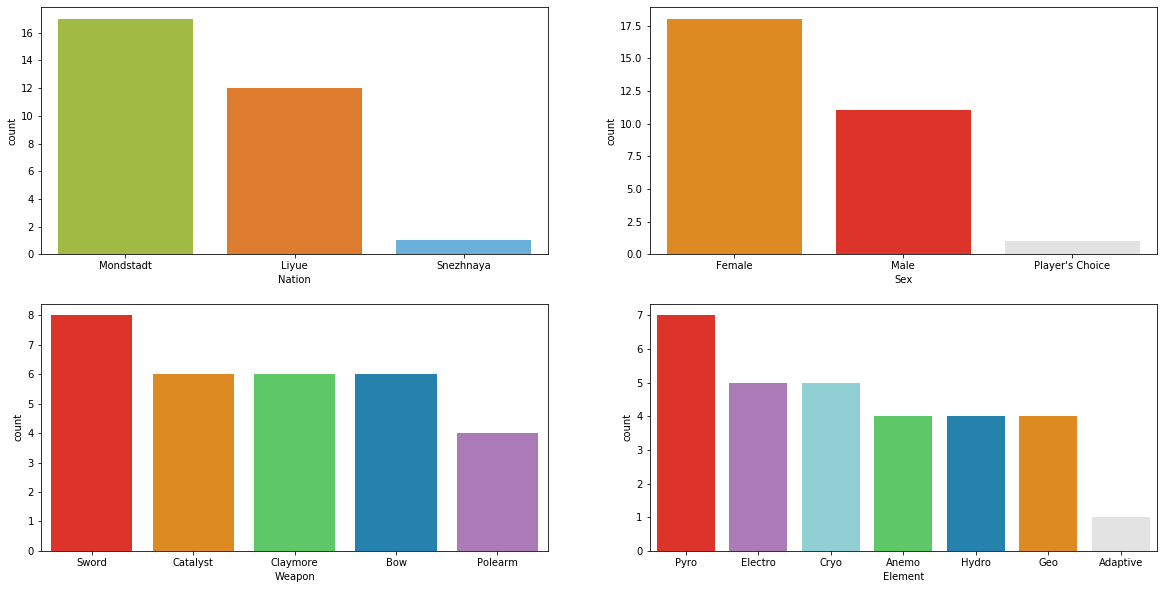

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

# defining color palette dictionary for better visual
palette_element ={"Pyro": "#FA1A0D", "Hydro": "#0D8BC4", "Geo": "#FD8D04", "Anemo": "#4CD95A", "Electro" : "#B071C1", "Cryo": "#85D8DF", "Adaptive":"#E3E3E3"}
palette_nation ={"Mondstadt": "#ABCE30", "Liyue": "#FA7711", "Snezhnaya": "#58B4EE"}
palette_weapon ={"Sword": "#FA1A0D", "Bow": "#0D8BC4", "Catalyst": "#FD8D04", "Claymore": "#4CD95A","Polearm" : "#B071C1"}
palette_sex ={"Male": "#FA1A0D", "Female": "#FD8D04", "Player's Choice": "#E3E3E3"}

palette_final = dict(palette_weapon)
palette_final.update(palette_element)
palette_final.update(palette_nation)
palette_final.update(palette_sex)

# define only important variable
categorical = ['Nation', 'Sex', 'Weapon', 'Element']
numerical = ['ATK', 'DEF']


# explore the data
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df3[variable], ax=subplot, palette = palette_final, order = df3[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

# exclude Scnezhnaya (childe) and Traveler from the data
exclude_scn = df3["Nation"]!="Snezhnaya"
exclude_traveler = df3["Name"]!="Traveler"



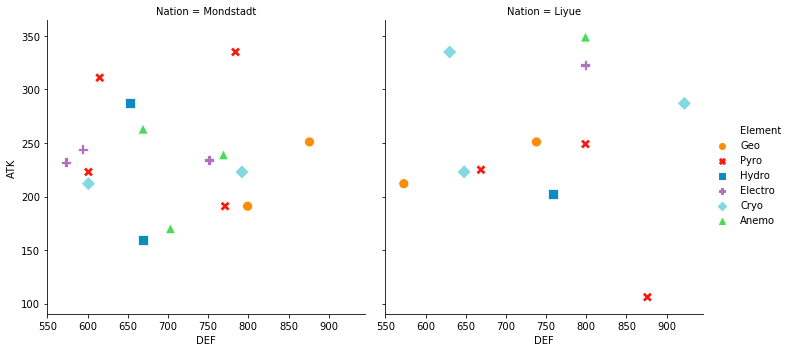

In [19]:
# compare Mondstadt & Liyue Element
sns.relplot(
    data=df3[exclude_scn&exclude_traveler], x="DEF", y="ATK",
    col="Nation", hue="Element", style="Element",
    kind="scatter", s = 100, palette = palette_final
)


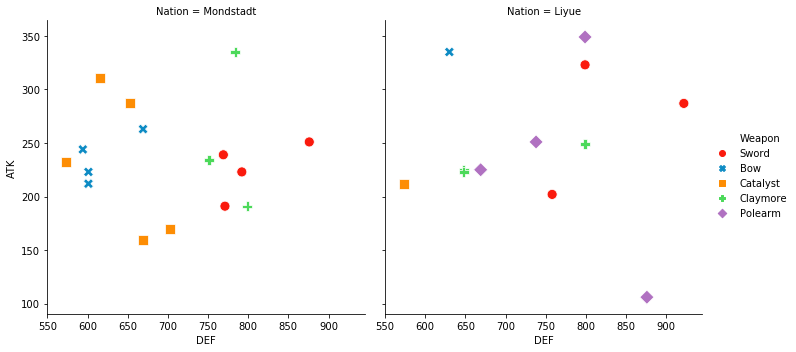

In [20]:
# compare Mondstadt & Liyue Weapon Type
sns.relplot(
    data=df3[exclude_scn&exclude_traveler], x="DEF", y="ATK",
    col="Nation", hue="Weapon", style="Weapon",
    kind="scatter", s = 100, palette = palette_final
)        

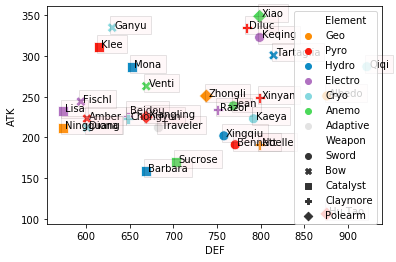

In [16]:
# plotting All character STR & DEF 

sns.scatterplot(x=df3['DEF'], y=df3['ATK'], hue = df3["Element"], style = df3["Weapon"], palette = palette_final, s = 100);

for i in range(df3.shape[0]):
    plt.text(x=df3.DEF[i]+2.5,y=(df3.ATK[i]+5 if df3.Name[i]=="Beidou" else df3.ATK[i]-0.2),s=df3.Name[i], 
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='pink',alpha=0.1))